In [ ]:
# 행렬 = 여러 개의 점들 N x D
# 주어진 한 점 = D 차원
# 행렬에 있는 점들 ~ 주어진 한 점 사이의 거리 구하기


In [7]:
import numpy as np
import matplotlib.pyplot as plt

#코드 실행 시간 측정
from pytictoc import TicToc

In [8]:
t = TicToc()
t.tic() # 시간 측정 시작
# 여기 사이의 시간을 측정
t.toc() # 시간 측정 종료

Elapsed time is 0.000022 seconds.


In [5]:
# 행렬을 쌓는 함수
# hstack : 오른쪽으로. 가로로 (horizon)
# vstatck : 아래로. 세로로 (vertical)

x = np.arange(10) # 1x10
y = 2*x           # 1x10

print(x)
print(x.shape)
print(y.shape)

# numpy 벡터는 행 벡터가 디폴트. x를 array로 만들어도 결과는 같다
z1 = np.hstack([x,y])   #1x20
z2 = np.vstack([x,y])  #2x10
print(z1)
print(z2)

[0 1 2 3 4 5 6 7 8 9]
(10,)
(10,)
[ 0  1  2  3  4  5  6  7  8  9  0  2  4  6  8 10 12 14 16 18]
[[ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]]


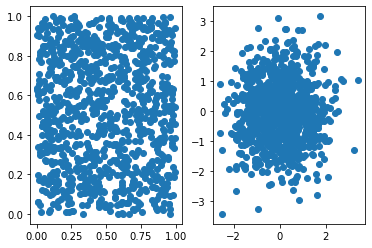

In [9]:
X = np.random.rand(1000,2)
Y = np.random.randn(1000,2)

plt.figure()
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1])
plt.subplot(1,2,2)
plt.scatter(Y[:,0],Y[:,1])

In [12]:
X = np.random.rand(10,2)
print(X)

print(np.sum(X)) #전체 값을 다 더함. 스칼라 하나
print(np.sum(X, axis = 0)) # 더하는 방향을 0번째 축으로. 행에 대해 덧셈 => 결과는 열
print(np.sum(X, axis = 1)) # 더하는 방향을 1번째 축으로. 열에 대해 덧셈 => 결과는 행

print(np.mean(X)) #전체 값에 대한 평균
print(np.mean(X, axis = 0)) # 행에 대한 평균
print(np.mean(X, axis = 1)) # 열에 대한 평균

[[0.19099413 0.42953893]
 [0.31125025 0.80792382]
 [0.47343748 0.1930285 ]
 [0.15634625 0.38529537]
 [0.32995722 0.88205394]
 [0.0022366  0.84486339]
 [0.29857732 0.52577014]
 [0.89391829 0.02901547]
 [0.45407926 0.49736765]
 [0.32940111 0.93228206]]
8.967337170584441
[3.4401979  5.52713927]
[0.62053306 1.11917406 0.66646598 0.54164161 1.21201116 0.8471
 0.82434746 0.92293376 0.95144691 1.26168317]
0.4483668585292221
[0.34401979 0.55271393]
[0.31026653 0.55958703 0.33323299 0.27082081 0.60600558 0.42355
 0.41217373 0.46146688 0.47572345 0.63084159]


In [14]:
x = np.random.rand(10)
print(x)
print(np.max(x)) # max 값 리턴
print(np.argmax(x)) # max 값이 있는 index 리턴.

# np.max(x) == x[np.argmax(x)]
# np.min(x) == x[np.argmin(x)]

print (np.where(x >= 0.5)) # 괄호 안이 참이 되는 값의 index를 리턴


[0.46820042 0.55728065 0.17187109 0.62792095 0.85890639 0.56009301
 0.96912795 0.05061954 0.30641158 0.18326385]
0.9691279485945378
6
(array([1, 3, 4, 5, 6], dtype=int64),)


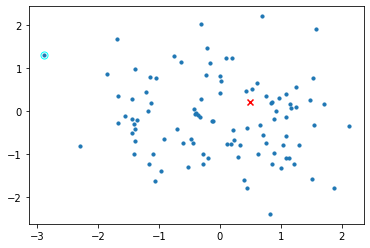

In [12]:
# 2차원 예시

N = 100 # 샘플의 개수
D = 2 # 차원 수

X = np.random.randn(N, D)  # N x D : N개의 D차원의 행벡터
z = np.array([0.5, 0.2])   # 거리를 구할 기준점

# 기준점으로부터의 각각의 거리를 모두 구하는 것
Dist = np.zeros(N) # Distance
for n in range(N) :
    Dist[n] = np.sqrt( (X[n,0]-z[0])**2 + (X[n,1]-z[1])**2 ) # 거리공식

idLong = np.argmax(Dist) # 가장 멀리 있는 점의 index

plt.scatter(X[idLong,0], X[idLong,1], s=50, edgecolor='cyan', facecolor='w')   # 가장 멀리있는 점
plt.scatter(X[:,0],X[:,1], s=10)                                               # 모든 점
plt.scatter(z[0], z[1], marker = 'x', facecolor = 'r')                         # 기준점

In [18]:
N = 100 
D = 2 

X = np.random.randn(N, D)  # N x D. N개의 점, D차원의 벡터, 행벡터로 들어감
z = np.array([0.5, 0.2])   # 거리를 구할 기준점

# 방법1 : 모든 100개의 점에 대해 거리를 각각 계산함
t.tic()
Dist1 = np.zeros(N) 
for n in range(N) :
    for d in range(D):
        Dist1[n] += (X[n,d]-z[d])**2
    Dist1[n] = np.sqrt(Dist1[n])
t.toc()

# 방법2 : 한번에 계산하고
t.tic()
Dist2 = np.zeros(N)
for n in range(N) :
    Dist2[n] = np.sqrt(np.sum((X[n,:]-z)**2))
t.toc()


Elapsed time is 0.000406 seconds.
Elapsed time is 0.000746 seconds.


In [ ]:
Z = np.matlib.repmat(z.reshape(1,D), N, 1)
Dist3 = np.sqrt( np.sum( (X-Z)**2, axis=1 ) )

In [28]:
import numpy.matlib

X = np.arange(4)
X = X.reshape(2,2)

print(X)

print(np.matlib.repmat(X, 3, 4)) # repeat matrix 세로로 3번, 가로로 4번 반복

[[0 1]
 [2 3]]
[[0 1 0 1 0 1 0 1]
 [2 3 2 3 2 3 2 3]
 [0 1 0 1 0 1 0 1]
 [2 3 2 3 2 3 2 3]
 [0 1 0 1 0 1 0 1]
 [2 3 2 3 2 3 2 3]]
